<a href="https://colab.research.google.com/github/coodjet/Exploratory_Data_AnalysisEDA_on_Diabetes_Data_Set/blob/main/Exploratory_Data_AnalysisEDA_on_Diabetes_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('exploratory-data-analysis-eda-on-diabetes-data-set')
jovian.set_colab_id('13PT1nxi15Grz384UtsRLBJT7Mj6UgZqP')

In [ ]:
import jovian

In [ ]:
jovian.commit(project='Exploratory Data Analysis(EDA) On Diabetes Data Set', environment=None)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "coodjet/exploratory-data-analysis-eda-on-diabetes-data-set" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/coodjet/exploratory-data-analysis-eda-on-diabetes-data-set


'https://jovian.ai/coodjet/exploratory-data-analysis-eda-on-diabetes-data-set'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

In [ ]:
from urllib.request import urlretrieve

urlretrieve('https://www.kaggle.com/uciml/pima-indians-diabetes-database','diabetes.csv')

('diabetes.csv', <http.client.HTTPMessage at 0x1358df919d0>)

In [ ]:
df=pd.read_csv(r"C:\Users\hp\Desktop\Documents\WPS Cloud Files\Downloads\diabetes.csv")

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## *Reviewing the data frame info*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## *See the top 5 records to better understand the data*

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Observations:

When we see the above table, values for  SkinThickness and Insulin are 0, which is not possible in the real world. So, as part of our data cleansing exercise(covered in the next steps), we have to drop all such records from our data frame.

## *Describe various properties of the data*

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## *Try to understand the outcomes*

In [ ]:
#To understand what are the types of outcome
print(df['Outcome'].unique())
print(df['Outcome'].value_counts())

[1 0]
0    500
1    268
Name: Outcome, dtype: int64


# Observations:

    There are only two outcomes 0 and 1, 0 refers to No Diabetes and 1 means the person is having diabetes
    The data set looks quite imbalanced as there are 500 people who are healthy and just 268 people who have diabetes.

## *To check if there are any null values in the data set*



In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values, we are good with it. If there are null values in the data set based on what is more meaningful to you, you can either drop that particular record or replace the null value with mean or median.

 # *Cleansing the Data*
    
    The hard fact is that real-world data is never perfect. You might need to spend a lot of time cleaning the data and         bringing it to a near-perfect state.

Based on our observation from the above analysis we have to drop a few records which are having 0 values. With the simple below code snippet, we drop all the records from the data frame where either Insulin or Blood Pressure or Skin Thickness or BMI, or Glucose levels are 0

In [ ]:
df=df[df['Insulin']!=0]
df=df[df['SkinThickness']!=0]
df=df[df['BloodPressure']!=0]
df=df[df['BMI']!=0]
df=df[df['Glucose']!=0]

 Let us try to once again see the data after dropping the records with 0 values for Insulin, Blood Pressure, Skin Thickness, BMI, and glucose levels

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see from the above table that the “min” values for Insulin, Blood Pressure, Skin Thickness, BMI, and glucose levels are no more 0’s. Our data cleansing worked.(smiles)

## *Analyzing the Data*

# *Bivariate Analysis:*  
   In Bivariate analysis, we analyze the outcomes w.r.t two variables using scatter and pair plots

Scatter Plot

Let us draw a simple scatterplot by projecting outcomes based on two features Glucose and Insulin

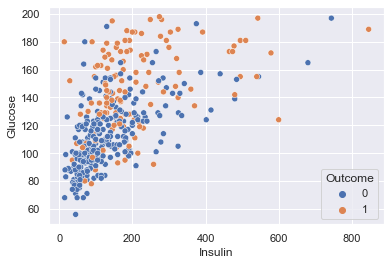

In [ ]:
sns.scatterplot(x='Insulin',y='Glucose',hue='Outcome', data=df)
plt.show()

The outcomes are all over the place. We need some superpowers to classify the outcomes based on these two features. Let's plot similar graphs for all the features.
Wait!, What? I have to do this 8C2(8 combination 2) times = 28 graphs.

Pair Plots

    Some good news! a pair plot can do it all for you with just a single line of code
    sns.pairplot(df,hue='Outcome')

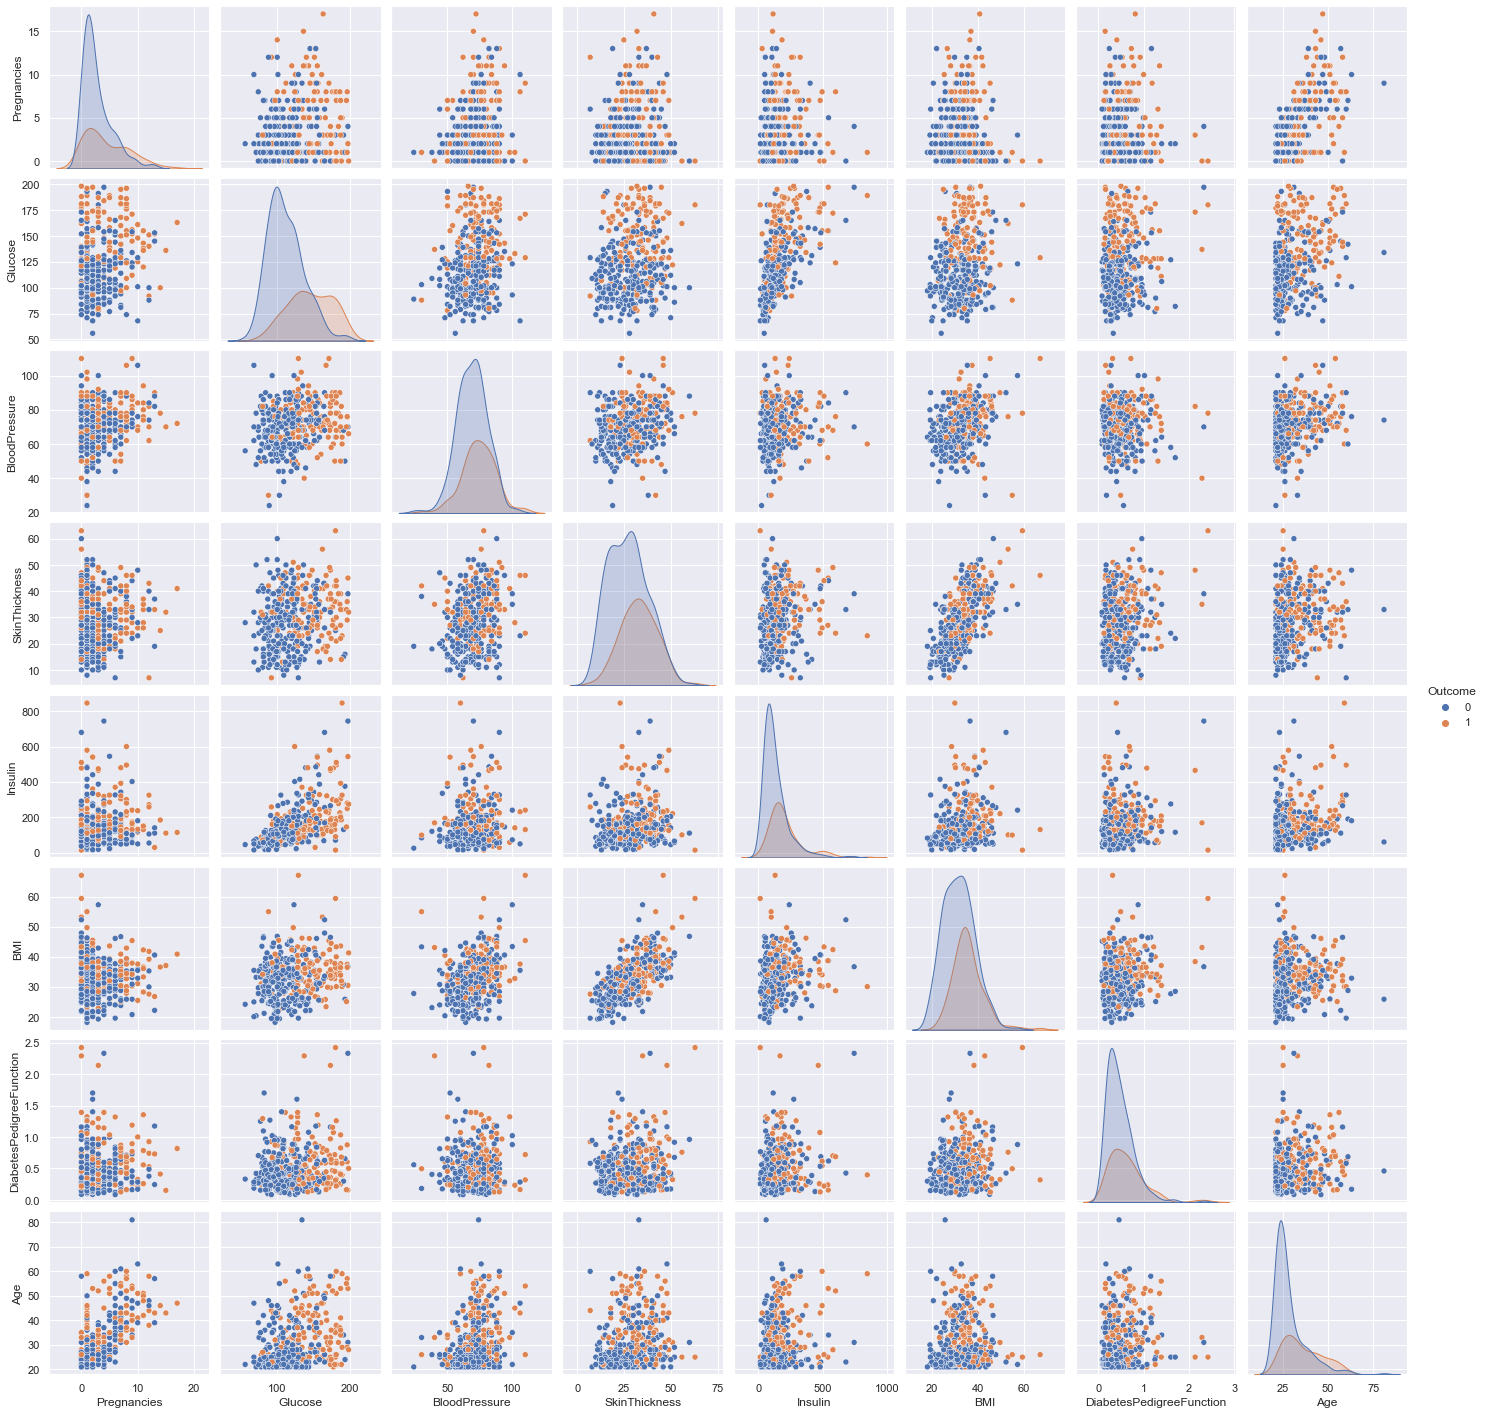

In [ ]:
sns.pairplot(df, hue='Outcome')

Once you plot the graphs, you will be able to see that (Glucose, Insulin),(SkinThickness, BMI) are useful in classifying the outcomes.


Although not so accurate, these features are better than others. To support this analysis let us also plot a Spearman Rank correlation coefficient heatmap to find the relation between the variables

## *Spearman Rank correlation coefficient*

<AxesSubplot:>

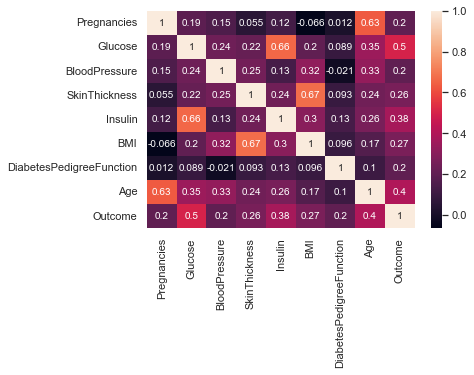

In [ ]:
corr = df.corr(method='spearman')
sns.heatmap(corr,annot=True)

Close to 1 indicates a very good relationship

Close to -1 indicates a very poor relationship
    
    From the above graph, we can see that the relationship is very strong for the below features
    Age-Pregnancies
    SkinThickness-BMI
    Glucose-Insulin
 
In addition to what we have observed in Pair plot analysis, we also found a strong relationship between age and pregnancy. Let us take all the 6 features and try to analyze them individually using Univariate analysis

## Univariate Analysis

In Univariate analysis, we analyze the outcomes w.r.t one variable at a time.

## Density Plot or Distribution Plot


A simple density plot to understand how Glucose is affecting the outcomes. We can see there is a lot of overlap.

The same plot can be generated for all other features to identify the patterns.

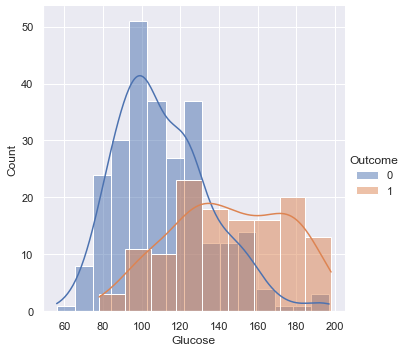

In [ ]:
sns.FacetGrid(df,hue='Outcome',height=5).map(sns.histplot,'Glucose',kde=True).add_legend()
plt.show()

Observations:

    The curve is right-skewed which indicates there are outliers.